# **Applying the Tile2vec model to the Eurosat dataset in the multispectral variant**

We downloaded dataset from https://www.kaggle.com/datasets/apollo2506/eurosat-dataset.

## About dataset

The data in the **EuroSat** dataset come from the Sentinel-2 satellite series, which are part of the European Space Agency's (ESA) program known as Copernicus. Sentinel-2 is a set of Earth observation satellites that collect multispectral images of the Earth, providing high-resolution spatial and spectral imaging.

The European Space Agency (ESA) monitors the Earth using its Sentinel satellites, gathering data on various aspects of the environment, including land use, changes in vegetation cover, water quality, climate change, etc. These data are publicly available for scientific, research, and engineering purposes.

The **EuroSat** dataset is a collection of geospatial images obtained from the Sentinel-2 satellite. It contains images in two main formats:

1. EuroSAT: This folder contains images in RGB format (red, green, blue), which were collected from the Sentinel dataset.

2. EuroSATallBands: This folder contains files in .tif format, which include all spectral bands collected from the Sentinel-2 satellite. These encompass a wider range of spectral data than just RGB.

Each image in this dataset is 64x64 pixels in size and is sampled at a distance of 10 meters. The EuroSat dataset is used for land use classification based on geospatial images, where the goal is to determine the top two land use categories in an image.

The two directories contain classifications of images from the EuroSat dataset based on land cover types. Each land cover category has been assigned to one of these folders. Here are descriptions of individual categories:

- **AnnualCrop**: Areas of agricultural crops where plants are cultivated for one year.
- **Forest**: Forested areas covered with trees.
- **HerbaceousVegetation**: Areas of green vegetation dominated by herbaceous plants.
- **Highway**: Areas of highways or motorways.
- **Industrial**: Industrial areas or industrial sites.
- **Pasture**: Pastures or areas used for grazing livestock.
- **PermanentCrop**: Permanent agricultural crops that are typically not harvested after one season.
- **Residential**: Residential areas, with residential buildings or urban infrastructure.
- **River**: Areas of rivers or streams.
- **SeaLake**: Areas of seas or lakes.

These categories describe various types of land use represented in the EuroSat dataset. Classifying images based on these categories enables analysis and understanding of changes in the environment and land use in different geographic areas.


## About Tile2vec model

The Tile2vec model is a data representation technique that utilizes deep learning to generate vector representations for tiles in satellite images or maps. The name "Tile2vec" is a reference to the popular natural language processing (NLP) model Word2vec, which generates vector representations of words based on the context of their occurrences.

The idea behind the Tile2vec model is that neighboring tiles in an image tend to represent similar features. For example, adjacent tiles may contain similar information about land types or environmental features. The Tile2vec model uses neural networks to learn representations of tiles based on these patterns.

The process can be divided into several main steps:

1. **Data Preparation**: Initially, satellite images or maps are divided into smaller tiles of a fixed size. These tiles serve as the basic units of analysis.

2. **Context Construction**: Next, for each tile, a context is created by obtaining a specified number of neighboring tiles. This context may include tiles located on the sides, above, below, or around the given tile.

3. **Learning Representations**: The Tile2vec model employs a neural network to learn vector representations for tiles based on their context. The network is trained in such a way that tiles with similar contexts have similar vector representations. This means that tiles occurring in similar contexts in the image should have similar vector representations.

4. **Application in Tasks**: After training the Tile2vec model, the obtained vector representations can be used for various image analysis tasks. For example, they can be used for terrain classification, change detection, image segmentation, and even generating new maps with high resolution.

## About project


During the project, we will focus on applying the Tile2vec model to the EurosatallBands dataset, which includes multispectral images.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..")


In [6]:
data = pd.read_csv('/storage/EuroSATallBands/train.csv')


                                            Filename  Label  \
0               PermanentCrop/PermanentCrop_2401.tif      6   
1               PermanentCrop/PermanentCrop_1006.tif      6   
2  HerbaceousVegetation/HerbaceousVegetation_1025...      2   
3                           SeaLake/SeaLake_1439.tif      9   
4                               River/River_1052.tif      8   

              ClassName  
0         PermanentCrop  
1         PermanentCrop  
2  HerbaceousVegetation  
3               SeaLake  
4                 River  
              Label
count  19317.000000
mean       4.524667
std        3.014749
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max        9.000000
Filename     0
Label        0
ClassName    0
dtype: int64


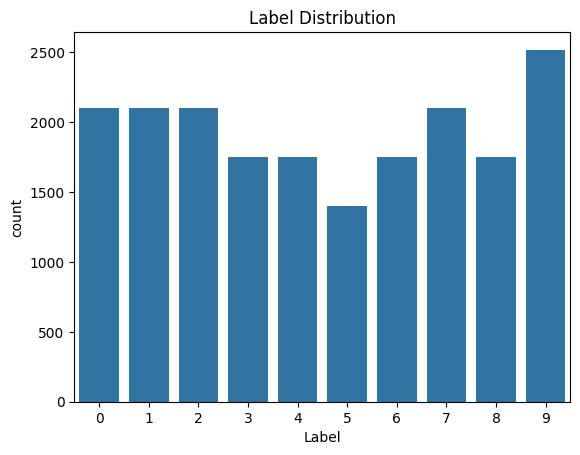

In [9]:
# Display the first few rows of the dataset
print(data.head())

# Get the summary statistics of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of the labels
sns.countplot(x='Label', data=data)
plt.title('Label Distribution')
plt.show()